In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

In [2]:
records_iq = pd.read_csv(
    './generated/1-features-iq.csv', 
    parse_dates=['week_start_date'], 
    index_col='week_start_date').interpolate()
records_sj = pd.read_csv(
    './generated/1-features-sj.csv', 
    parse_dates=['week_start_date'], 
    index_col='week_start_date').interpolate()

In [3]:
training_targets_iq = pd.read_csv(
    './generated/1-labels-train-iq.csv', 
    parse_dates=['week_start_date'], 
    index_col='week_start_date')
training_targets_sj = pd.read_csv(
    './generated/1-labels-train-sj.csv', 
    parse_dates=['week_start_date'], 
    index_col='week_start_date')

In [4]:
stl_dec_iq = pd.read_csv(
    './generated/2-time-dec-features-iq.csv', 
    parse_dates=['week_start_date'], 
    index_col='week_start_date')
stl_dec_sj = pd.read_csv(
    './generated/2-time-dec-features-sj.csv', 
    parse_dates=['week_start_date'], 
    index_col='week_start_date')

In [5]:
records_train_iq = pd.concat([records_iq.head(520), training_targets_iq[['total_cases']]], axis=1)
records_train_sj = pd.concat([records_sj.head(936), training_targets_sj[['total_cases']]], axis=1)

stl_dec_train_iq = pd.concat([stl_dec_iq.head(520), training_targets_iq[['total_cases']]], axis=1)
stl_dec_train_sj = pd.concat([stl_dec_sj.head(936), training_targets_sj[['total_cases']]], axis=1)
stl_dec_test_iq = stl_dec_iq.tail(156)
stl_dec_test_sj = stl_dec_sj.tail(260)

In [6]:
def lagged_corr(df, skip_col, label_col, lag):
    lcorr = pd.concat([
        df.drop(skip_col, axis=1).shift(lag),
        df[[label_col]]], axis=1).corr()

    lcorr_label = lcorr[label_col].drop(label_col)

    return lcorr_label

In [7]:
records_multi_lagged_corr_iq = pd.DataFrame(
    {i: lagged_corr(records_train_iq, ['total_cases', 'weekofyear'], 'total_cases', i) for i in range(25)}
).T

Text(0.5,1,'Iquitos feature/label correlations')

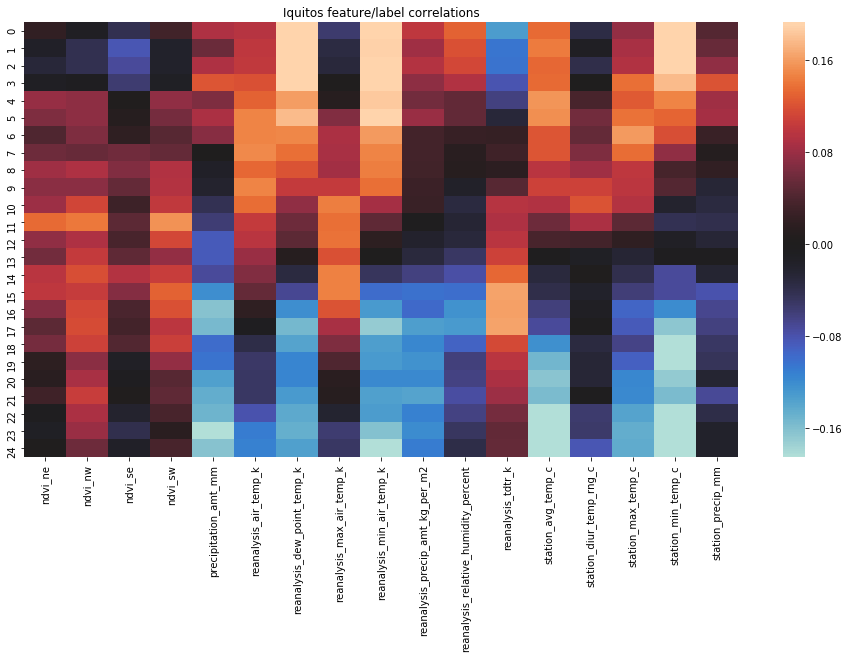

In [8]:
plt.figure(figsize=(16, 8))
sns.heatmap(records_multi_lagged_corr_iq, robust=True, center=0)
plt.title('Iquitos feature/label correlations')

In [9]:
records_multi_lagged_corr_sj = pd.DataFrame(
    {i: lagged_corr(records_train_sj, ['total_cases', 'weekofyear'], 'total_cases', i) for i in range(25)}
).T

Text(0.5,1,'San Juan feature/label correlations')

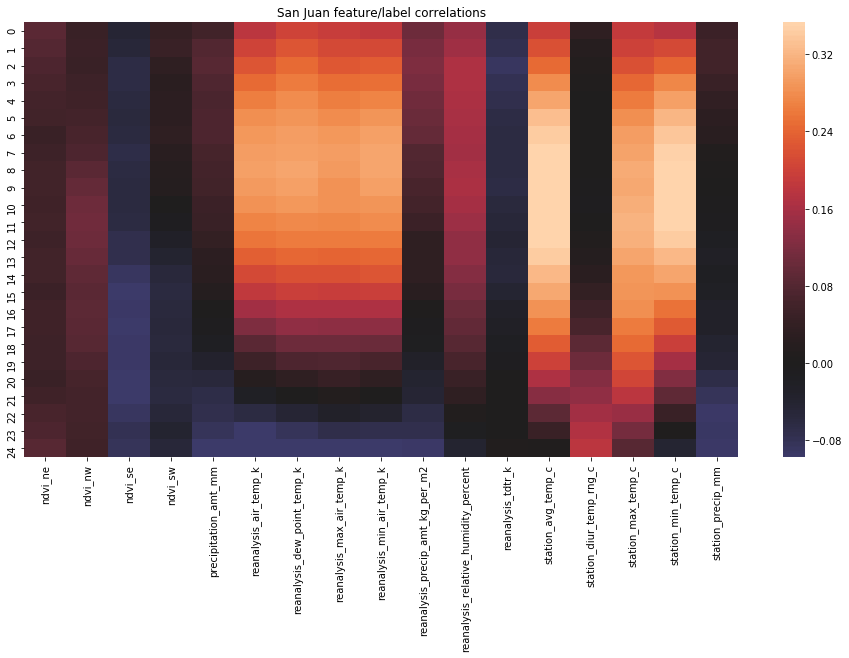

In [10]:
plt.figure(figsize=(16, 8))
sns.heatmap(records_multi_lagged_corr_sj, robust=True, center=0)
plt.title('San Juan feature/label correlations')

In [11]:
stl_dec_multi_lagged_corr_iq = pd.DataFrame(
    {i: lagged_corr(stl_dec_train_iq, ['total_cases'], 'total_cases', i) for i in range(25)}
).T

Text(0.5,1,'Iquitos STLdec/label correlations')

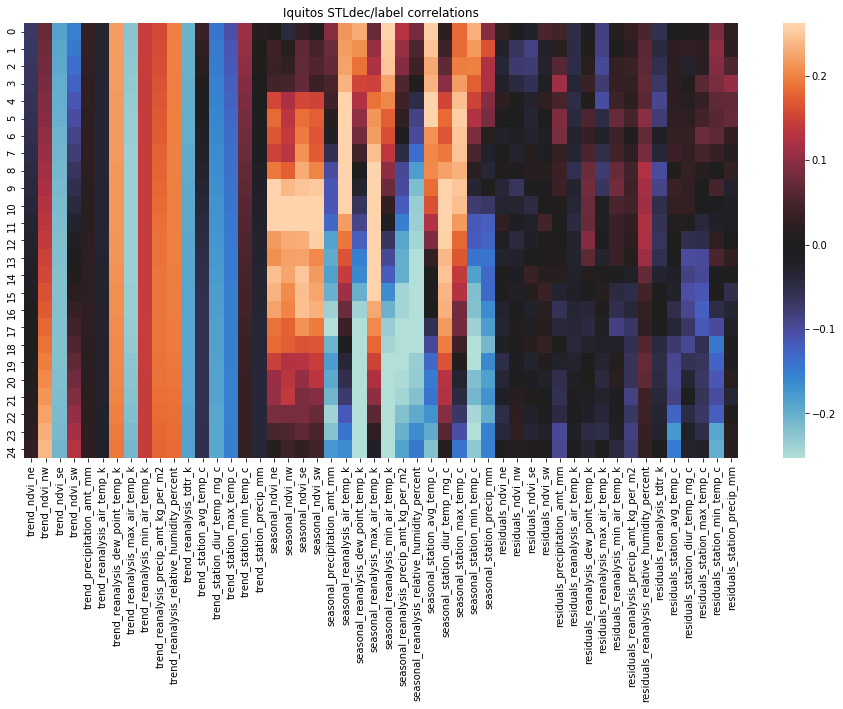

In [12]:
plt.figure(figsize=(16, 8))
sns.heatmap(stl_dec_multi_lagged_corr_iq, robust=True, center=0)
plt.title('Iquitos STLdec/label correlations')

In [13]:
stl_dec_multi_lagged_corr_sj = pd.DataFrame(
    {i: lagged_corr(stl_dec_train_sj, ['total_cases'], 'total_cases', i) for i in range(25)}
).T

Text(0.5,1,'San Juan STLdec/label correlations')

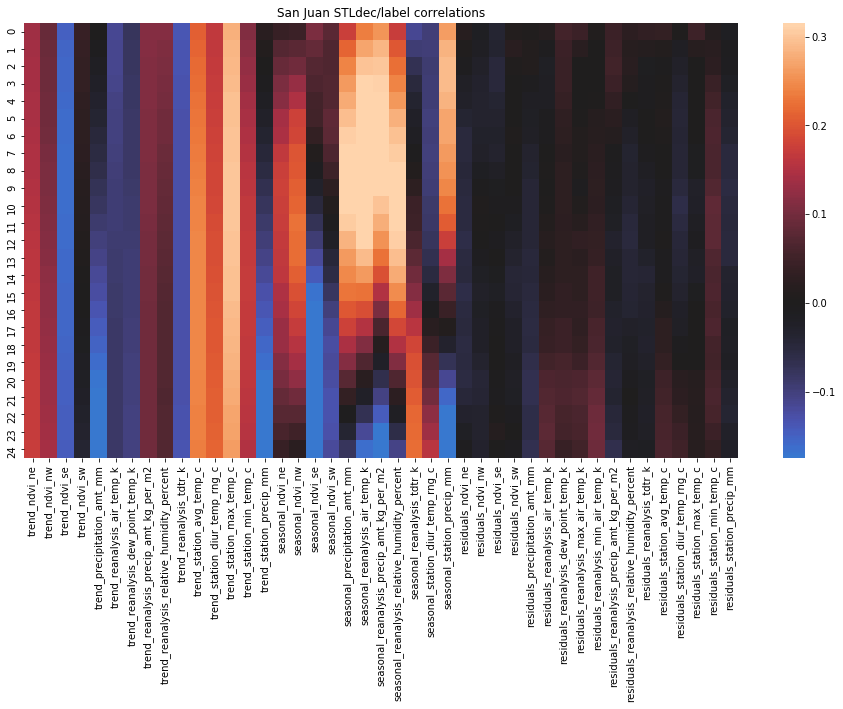

In [14]:
plt.figure(figsize=(16, 8))
sns.heatmap(stl_dec_multi_lagged_corr_sj, robust=True, center=0)
plt.title('San Juan STLdec/label correlations')

In [15]:
records_ml_corr_max = pd.concat({
    'max_iq': records_multi_lagged_corr_iq.max(),
    'max_sj':records_multi_lagged_corr_sj.max(),
    'min_iq': records_multi_lagged_corr_iq.min(),
    'min_sj': records_multi_lagged_corr_sj.min()
}, axis=1)

records_ml_corr_argmax = pd.concat({
    'argmax_iq': records_multi_lagged_corr_iq.idxmax(), 
    'argmax_sj': records_multi_lagged_corr_sj.idxmax(), 
    'argmin_iq': records_multi_lagged_corr_iq.idxmin(), 
    'argmin_sj': records_multi_lagged_corr_sj.idxmin(), 
}, axis=1)

pd.concat([records_ml_corr_argmax, records_ml_corr_max], axis=1)

,argmax_iq,argmax_sj,argmin_iq,argmin_sj,max_iq,max_sj,min_iq,min_sj
ndvi_ne,11,0,2,6,0.134053,0.085918,-0.027999,0.049902
ndvi_nw,11,11,2,0,0.142283,0.108545,-0.041888,0.047403
ndvi_se,14,0,1,15,0.093327,-0.043680,-0.082013,-0.101344
ndvi_sw,11,1,2,21,0.155339,0.048514,-0.017795,-0.058046
precipitation_amt_mm,3,2,23,24,0.123252,0.084071,-0.186624,-0.105622
reanalysis_air_temp_k,7,8,24,24,0.150917,0.298098,-0.112790,-0.140708
reanalysis_dew_point_temp_k,0,8,17,24,0.229183,0.302423,-0.153087,-0.127264
reanalysis_max_air_temp_k,15,7,23,24,0.146816,0.295952,-0.056224,-0.109959
reanalysis_min_air_temp_k,0,8,24,24,0.211679,0.303374,-0.184034,-0.111824
reanalysis_precip_amt_kg_per_m2,0,2,21,24,0.101150,0.123420,-0.137581,-0.093968


In [16]:
stl_dec_ml_corr_max = pd.concat({
    'max_iq': stl_dec_multi_lagged_corr_iq.max(),
    'max_sj': stl_dec_multi_lagged_corr_sj.max(),
    'min_iq': stl_dec_multi_lagged_corr_iq.min(),
    'min_sj': stl_dec_multi_lagged_corr_sj.min()
}, axis=1, sort=True)

stl_dec_ml_corr_argmax = pd.concat({
    'argmax_iq': stl_dec_multi_lagged_corr_iq.idxmax(), 
    'argmax_sj': stl_dec_multi_lagged_corr_sj.idxmax(), 
    'argmin_iq': stl_dec_multi_lagged_corr_iq.idxmin(), 
    'argmin_sj': stl_dec_multi_lagged_corr_sj.idxmin(), 
}, axis=1, sort=True)

pd.concat([stl_dec_ml_corr_argmax, stl_dec_ml_corr_max], axis=1)

,argmax_iq,argmax_sj,argmin_iq,argmin_sj,max_iq,max_sj,min_iq,min_sj
residuals_ndvi_ne,0.0,0.0,19.0,15.0,0.030328,0.018892,-0.050563,-0.059216
residuals_ndvi_nw,23.0,10.0,2.0,20.0,0.029047,0.006129,-0.073725,-0.042328
residuals_ndvi_se,14.0,23.0,1.0,2.0,0.035933,0.014370,-0.086572,-0.046632
residuals_ndvi_sw,0.0,1.0,2.0,14.0,0.051664,0.021757,-0.028212,-0.044166
residuals_precipitation_amt_mm,3.0,1.0,23.0,24.0,0.112020,0.010886,-0.097489,-0.069027
residuals_reanalysis_air_temp_k,21.0,23.0,8.0,2.0,0.003254,0.080071,-0.056745,-0.019374
residuals_reanalysis_dew_point_temp_k,12.0,21.0,23.0,7.0,0.093628,0.065964,-0.045542,0.021959
residuals_reanalysis_max_air_temp_k,15.0,21.0,4.0,9.0,0.013154,0.071434,-0.103305,-0.004247
residuals_reanalysis_min_air_temp_k,9.0,23.0,17.0,3.0,0.082370,0.098627,-0.083967,-0.001215
residuals_reanalysis_precip_amt_kg_per_m2,5.0,2.0,21.0,24.0,0.048858,0.051978,-0.087017,-0.064547


Text(0.5,1,'Maximum lagged cross correlation')

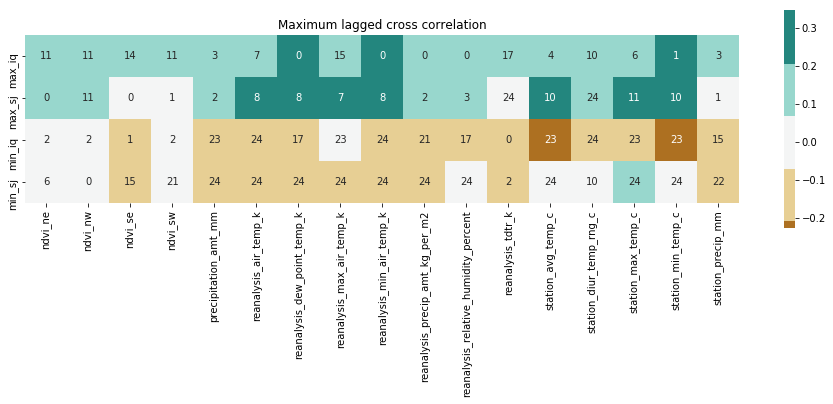

In [17]:
plt.figure(figsize=(16, 4))
sns.heatmap(records_ml_corr_max.T, 
            cmap=sns.color_palette('BrBG', n_colors=5), 
            robust=True, 
            square=True, 
            center=0,
            annot=records_ml_corr_argmax.T)
plt.title('Maximum lagged cross correlation')

Text(0.5,1,'Maximum lagged cross correlation for STL decomposed seasonal data')

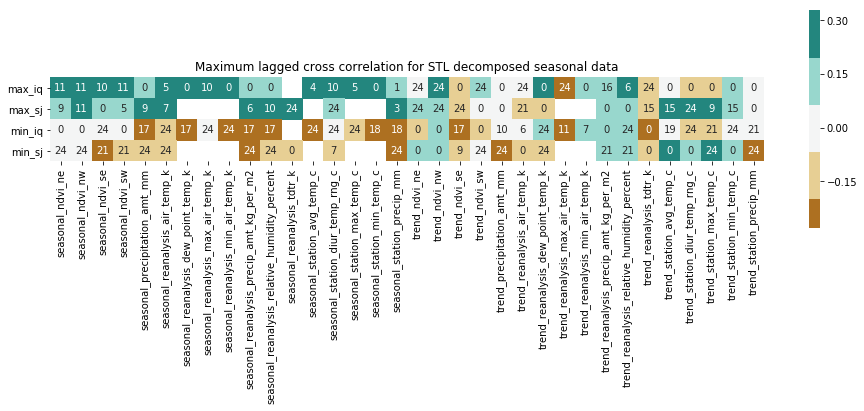

In [18]:
plt.figure(figsize=(16, 4))
stl_dec_ml_corr_max_filter = list(map(
    lambda s: s.startswith('seasonal') or s.startswith('trend'), 
    stl_dec_ml_corr_max.index.values))
sns.heatmap(
    stl_dec_ml_corr_max[stl_dec_ml_corr_max_filter].T, 
    cmap=sns.color_palette('BrBG', n_colors=5), 
    robust=True, 
    square=True, 
    center=0,
    annot=stl_dec_ml_corr_argmax[stl_dec_ml_corr_max_filter].T)
plt.title('Maximum lagged cross correlation for STL decomposed seasonal data')

In [19]:
features_1_iq = stl_dec_iq[[
    'trend_ndvi_se', # 11
    'trend_reanalysis_dew_point_temp_k', # 0
    'trend_reanalysis_max_air_temp_k', # 10
    'trend_reanalysis_relative_humidity_percent', # 6
    'trend_reanalysis_tdtr_k', # 0
    'seasonal_ndvi_ne', # 11 
    'seasonal_ndvi_nw', # 11
    'seasonal_ndvi_se', # 11
    'seasonal_ndvi_sw', # 11
    'seasonal_precipitation_amt_mm', # 17
    'seasonal_reanalysis_air_temp_k', # 5
    'seasonal_reanalysis_dew_point_temp_k', # 0
    'seasonal_reanalysis_max_air_temp_k', # 10
    'seasonal_reanalysis_min_air_temp_k', # 0
    'seasonal_reanalysis_precip_amt_kg_per_m2', # 17
    'seasonal_reanalysis_relative_humidity_percent', # 6
    'seasonal_station_avg_temp_c', # 4
    'seasonal_station_diur_temp_rng_c', # 10
    'seasonal_station_max_temp_c', # 5
    'seasonal_station_min_temp_c', # 0
    'seasonal_station_precip_mm' # 18
]]

features_1_iq[[
    'trend_ndvi_se', 'seasonal_ndvi_ne', 'seasonal_ndvi_nw', 'seasonal_ndvi_se', 'seasonal_ndvi_sw'
]] = features_1_iq[[
    'trend_ndvi_se', 'seasonal_ndvi_ne', 'seasonal_ndvi_nw', 'seasonal_ndvi_se', 'seasonal_ndvi_sw'
]].shift(11)
features_1_iq[[
    'seasonal_reanalysis_air_temp_k', 'seasonal_station_max_temp_c'
]] = features_1_iq[[
    'seasonal_reanalysis_air_temp_k', 'seasonal_station_max_temp_c'
]].shift(5)
features_1_iq[[
    'seasonal_reanalysis_max_air_temp_k', 'trend_reanalysis_max_air_temp_k', 
    'seasonal_station_diur_temp_rng_c'
]] = features_1_iq[[
    'seasonal_reanalysis_max_air_temp_k', 'trend_reanalysis_max_air_temp_k', 
    'seasonal_station_diur_temp_rng_c'
]].shift(10)
features_1_iq[[
    'seasonal_precipitation_amt_mm', 'seasonal_reanalysis_precip_amt_kg_per_m2'
]] = features_1_iq[[
    'seasonal_precipitation_amt_mm', 'seasonal_reanalysis_precip_amt_kg_per_m2'
]].shift(17)
features_1_iq[['seasonal_station_avg_temp_c']] = features_1_iq[['seasonal_station_avg_temp_c']].shift(4)
features_1_iq[[
    'trend_reanalysis_relative_humidity_percent', 'seasonal_reanalysis_relative_humidity_percent'
]] = features_1_iq[[
    'trend_reanalysis_relative_humidity_percent', 'seasonal_reanalysis_relative_humidity_percent'
]].shift(6)
features_1_iq[['seasonal_station_precip_mm']] = features_1_iq[['seasonal_station_precip_mm']].shift(18)

C:\Users\umste\Anaconda3\envs\datasc\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [20]:
features_1_sj = stl_dec_sj[[
    'seasonal_ndvi_nw', # 11
    'seasonal_precipitation_amt_mm', # 9
    'seasonal_reanalysis_air_temp_k', # 7
    'seasonal_reanalysis_precip_amt_kg_per_m2', # 6
    'seasonal_reanalysis_relative_humidity_percent', # 10
    'seasonal_station_precip_mm', # 3
    'trend_station_avg_temp_c', # 15
    'trend_station_max_temp_c' # 9
]]

features_1_sj[['seasonal_station_precip_mm']] = features_1_sj[['seasonal_station_precip_mm']].shift(3)
features_1_sj[[
    'seasonal_reanalysis_precip_amt_kg_per_m2'
]] = features_1_sj[[
    'seasonal_reanalysis_precip_amt_kg_per_m2'
]].shift(6)
features_1_sj[['seasonal_reanalysis_air_temp_k']] = features_1_sj[['seasonal_reanalysis_air_temp_k']].shift(7)
features_1_sj[[
    'seasonal_precipitation_amt_mm', 'trend_station_max_temp_c'
]] = features_1_sj[[
    'seasonal_precipitation_amt_mm', 'trend_station_max_temp_c'
]].shift(9)
features_1_sj[[
    'seasonal_reanalysis_relative_humidity_percent'
]] = features_1_sj[[
    'seasonal_reanalysis_relative_humidity_percent'
]].shift(10)
features_1_sj[['seasonal_ndvi_nw']] = features_1_sj[['seasonal_ndvi_nw']].shift(11)
features_1_sj[['trend_station_avg_temp_c']] = features_1_sj[['trend_station_avg_temp_c']].shift(15)

C:\Users\umste\Anaconda3\envs\datasc\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [21]:
features_1_train_iq = pd.concat([
    features_1_iq.head(520), training_targets_iq[['total_cases']], records_iq.head(520)[['weekofyear']]
], axis=1).dropna()
features_1_train_sj = pd.concat([
    features_1_sj.head(936), training_targets_sj[['total_cases']], records_sj.head(936)[['weekofyear']]
], axis=1).dropna()
features_1_test_iq = pd.concat([features_1_iq.tail(156), records_iq.tail(156)[['weekofyear']]], axis=1)
features_1_test_sj = pd.concat([features_1_sj.tail(260), records_sj.tail(260)[['weekofyear']]], axis=1)

In [22]:
features_1_train_iq.to_csv('./generated/3-refined-1-train-iq.csv')
features_1_train_sj.to_csv('./generated/3-refined-1-train-sj.csv')
features_1_test_iq.to_csv('./generated/3-refined-1-test-iq.csv')
features_1_test_sj.to_csv('./generated/3-refined-1-test-sj.csv')